# Importacion de librerias

In [4]:
#recordar crear un enviroment

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

# LECTURAS DATOS

In [6]:
data_dir = 'DailyDelhiClimateTrain.csv'
df = pd.read_csv(data_dir)

In [7]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


**Set Date column as an index**

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)

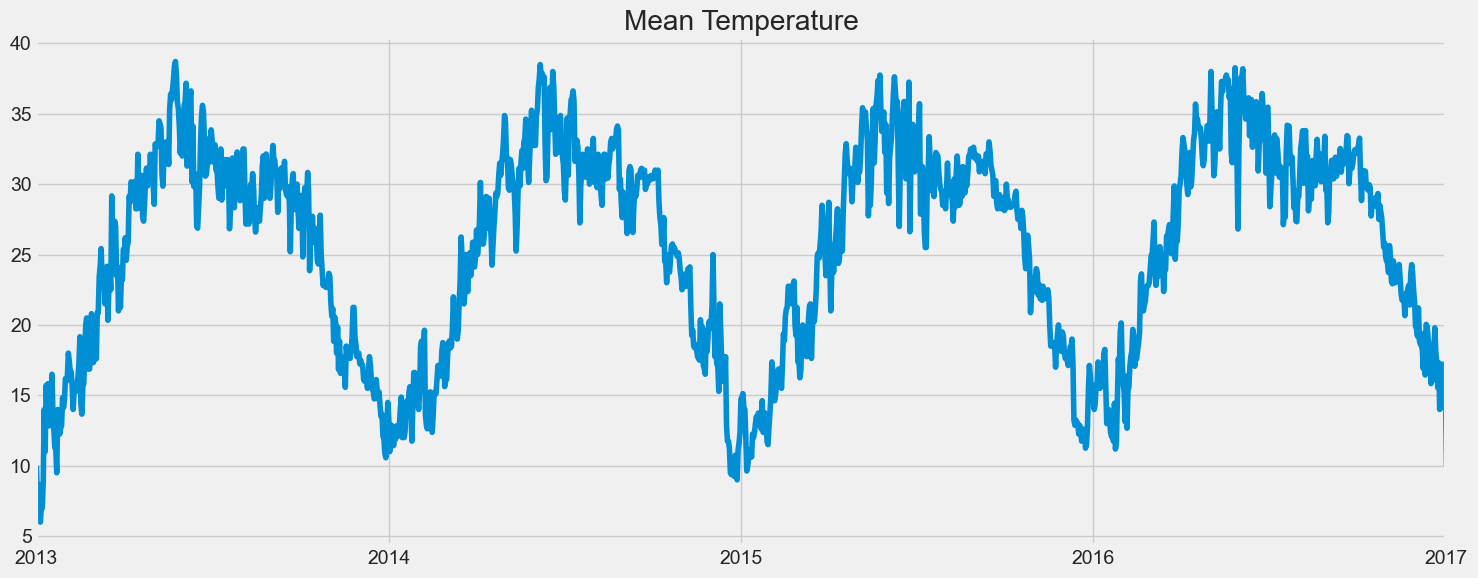

In [10]:
plt.figure(figsize=(15, 6))
df['meantemp'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Mean Temperature")
plt.tight_layout()
plt.show()


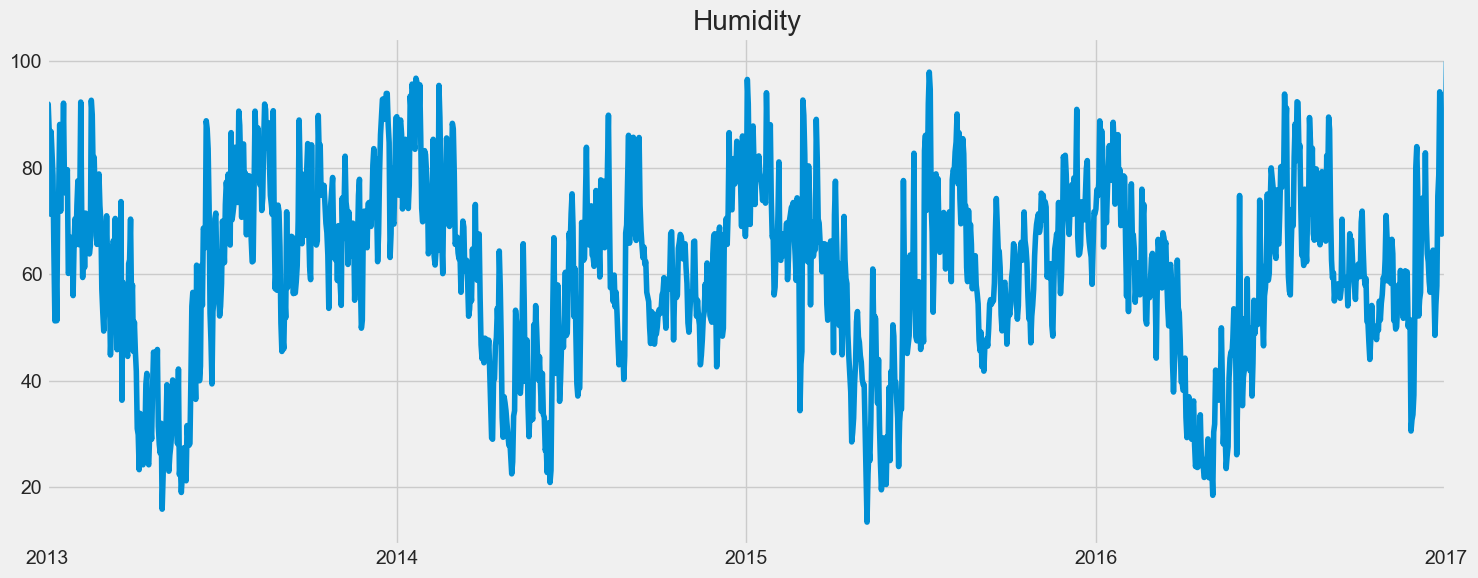

In [11]:
plt.figure(figsize=(15, 6))
df['humidity'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Humidity")
plt.tight_layout()
plt.show()

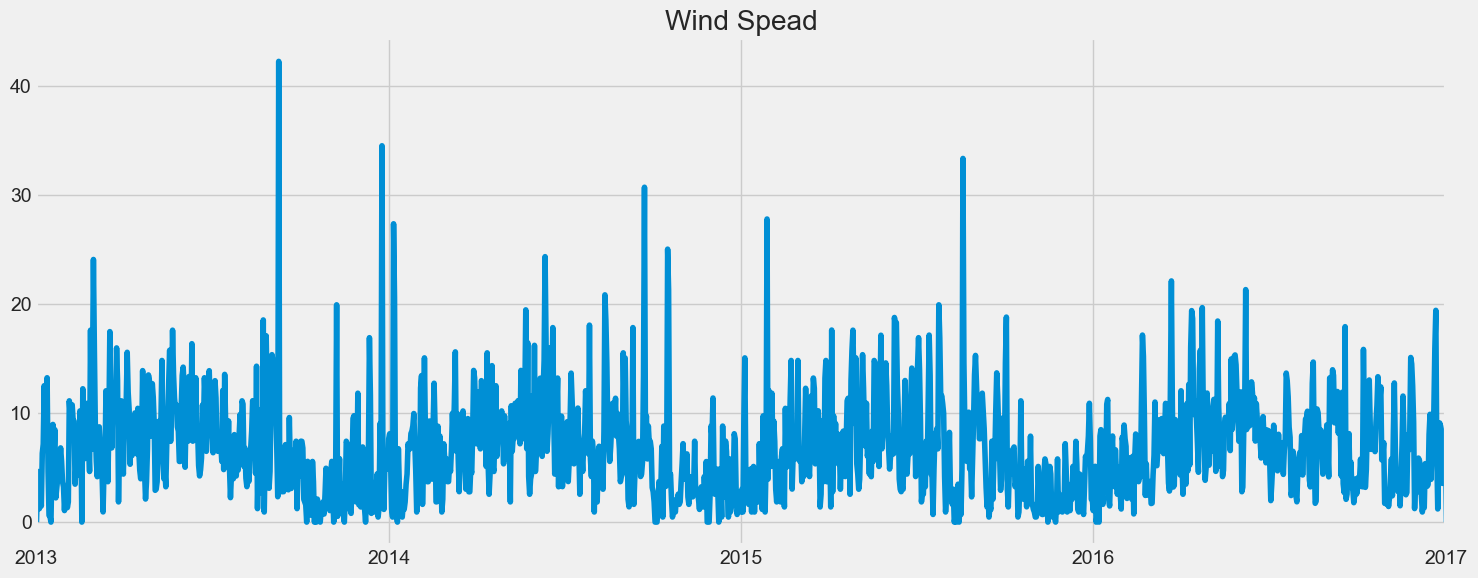

In [12]:
plt.figure(figsize=(15, 6))
df['wind_speed'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Wind Spead")
plt.tight_layout()
plt.show()

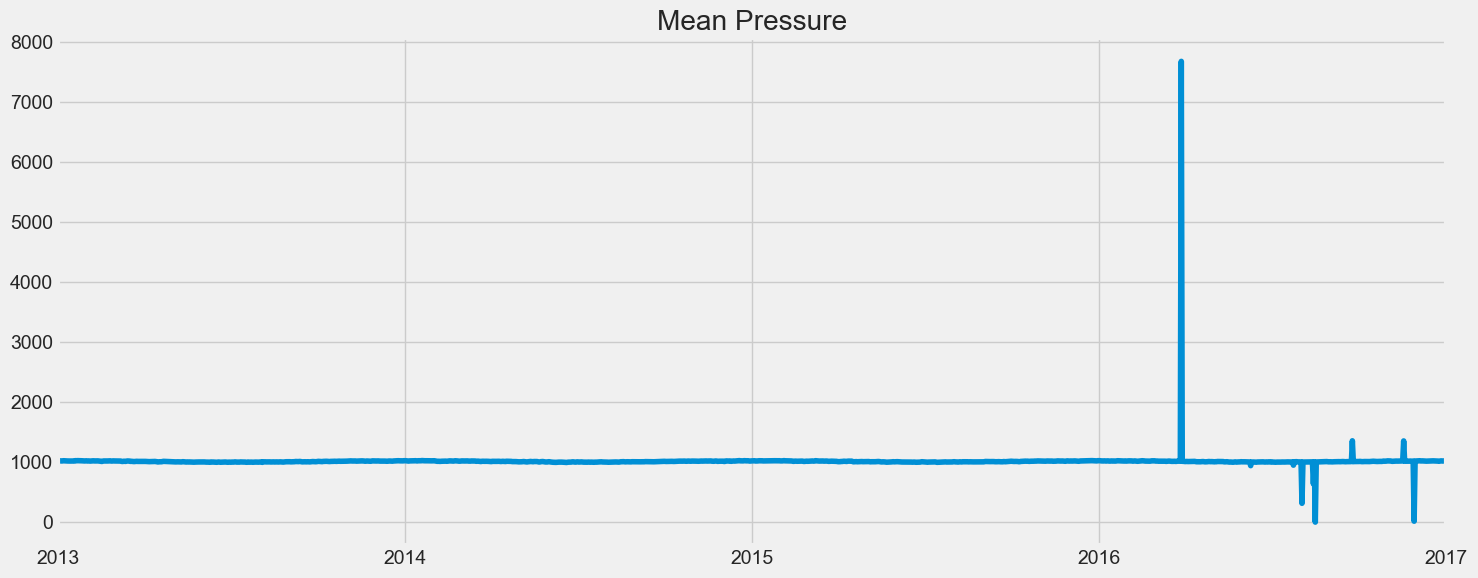

In [13]:
plt.figure(figsize=(15, 6))
df['meanpressure'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Mean Pressure")
plt.tight_layout()
plt.show()

# Data Preprocessing

**Choosing Prediction Column**

In [14]:
n_cols = 1
dataset = df["meantemp"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1462, 1)

**Normalizing Data**

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

**Splitting Data**

In [16]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1096 Test Size : 366


In [17]:
train_data = scaled_data[0:train_size, :]
train_data.shape


(1096, 1)

**Creating training set**

In [19]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)
        

X_train:  [array([[0.12227074],
       [0.04279476],
       [0.0356623 ],
       [0.08151383],
       [0.        ],
       [0.03056769],
       [0.03056769],
       [0.08733624],
       [0.24454148],
       [0.15283843],
       [0.29694323],
       [0.24454148],
       [0.30058224],
       [0.20887918],
       [0.26637555],
       [0.23944687],
       [0.3209607 ],
       [0.23944687],
       [0.19868996],
       [0.16157205],
       [0.15895197],
       [0.1069869 ],
       [0.24454148],
       [0.23944687],
       [0.19104803],
       [0.20378457],
       [0.20960699],
       [0.27001456],
       [0.24836245],
       [0.26637555],
       [0.31179039],
       [0.30567686],
       [0.31441048],
       [0.36681223],
       [0.34934498],
       [0.32478166],
       [0.32605531],
       [0.29344978],
       [0.24454148],
       [0.28820961],
       [0.28275109],
       [0.3018559 ],
       [0.2852984 ],
       [0.31441048],
       [0.34643377],
       [0.40247453],
       [0.25764192],
  

In [20]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [22]:
x_train.shape , y_train.shape

((1402, 60, 1), (1402, 1))

# LSTM Model

**Model Structure**

In [23]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


**Model Training**

In [24]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
44/44 [==============================] - 9s 58ms/step - loss: 0.0362 - mean_absolute_error: 0.1333
Epoch 2/100
44/44 [==============================] - 3s 58ms/step - loss: 0.0057 - mean_absolute_error: 0.0605
Epoch 3/100
44/44 [==============================] - 3s 60ms/step - loss: 0.0049 - mean_absolute_error: 0.0549
Epoch 4/100
44/44 [==============================] - 3s 59ms/step - loss: 0.0049 - mean_absolute_error: 0.0553
Epoch 5/100
44/44 [==============================] - 3s 58ms/step - loss: 0.0046 - mean_absolute_error: 0.0537
Epoch 6/100
44/44 [==============================] - 3s 59ms/step - loss: 0.0045 - mean_absolute_error: 0.0525
Epoch 7/100
44/44 [==============================] - 3s 61ms/step - loss: 0.0050 - mean_absolute_error: 0.0561
Epoch 8/100
44/44 [==============================] - 3s 58ms/step - loss: 0.0044 - mean_absolute_error: 0.0517
Epoch 9/100
44/44 [==============================] - 3s 58ms/step - loss: 0.0044 - mean_absolute_error: 0.0519
E

# Model Evaluation

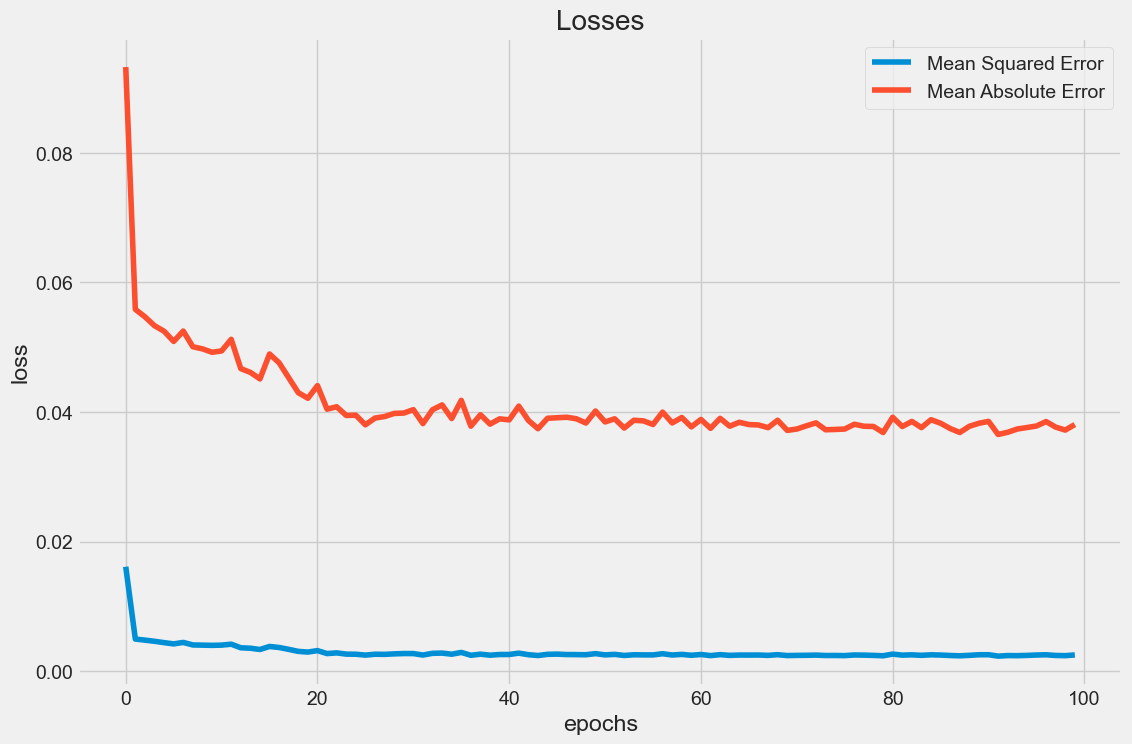

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Predection

**Creating testing set**

In [22]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [23]:
# Get Prediction
predictions = model.predict(x_test)

12/12 [==============================] - 1s 7ms/step


In [24]:
predictions.shape

(366, 1)

In [25]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(366, 1)

**Root mean square error**

In [26]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [27]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.63

In [28]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,14.718980,14.000000
1,14.236148,14.375000
2,14.379716,15.750000
3,15.326511,15.833333
4,15.622904,17.375000
...,...,...
361,16.756420,17.217391
362,16.997164,15.238095
363,15.726826,14.095238
364,14.670197,15.052632


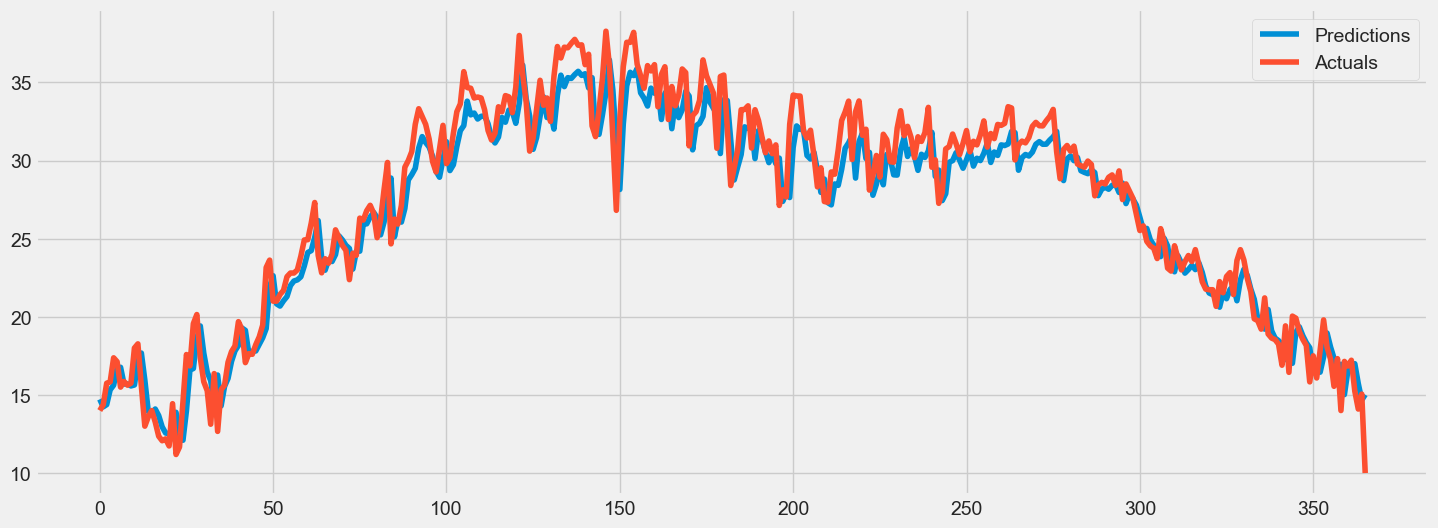

In [29]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

**Visualize Predictions with The Data**

In [3]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Temperature Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Temperature', fontsize= 18)
plt.plot(train['meantemp'], linewidth= 3)
plt.plot(test['meantemp'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

KeyboardInterrupt: 